<a href="https://colab.research.google.com/github/The-vinicius/D0wnTub3/blob/master/git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#loanding data
df = pd.read_csv('/content/drive/My Drive/semana-data-science/breast-cancer-wisconsin.csv')

In [2]:
df.head(10)

,ID,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [12]:
df.apply(lambda x: len(x.unique()))

ID                             645
clump_thickness                 10
cell_size                       10
cell_shape                      10
marginal_adhesion               10
single_epithelial_cell_size     10
bare_nuclei                     10
bland_chromatin                 10
normal_nucleoli                 10
mitoses                          9
class                            2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   cell_size                    699 non-null    int64 
 3   cell_shape                   699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df.bare_nuclei.replace('?',1, inplace=True)

In [8]:
df.bare_nuclei = pd.to_numeric(df.bare_nuclei)

In [13]:
var=['clump_thickness', 'cell_size', 'cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
for i in var:
    df[i] = df[i].astype('int8')

plotting charts with the matplotlib library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.style.use('ggplot')

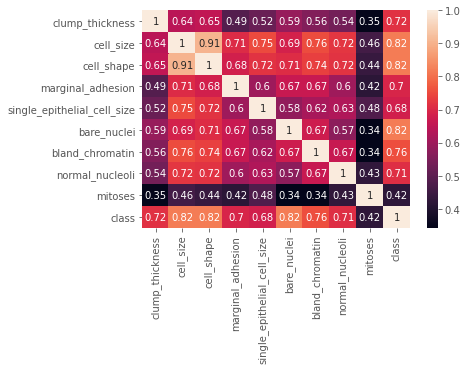

In [ ]:
sns.heatmap(df[var].corr(), annot=True)

building prediction models

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [46]:
def result(x_train, x_test, y_train, y_test, model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(accuracy_score(y_test, predictions.round()))

In [29]:
x = df.drop(columns=['class', 'ID'])
y = df['class']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
model = LinearRegression()
result(x_train, x_test, y_train, y_test, model)

0.8571428571428571


In [50]:
model = RandomForestRegressor()
result(x_train, x_test, y_train, y_test, model)

0.9071428571428571


In [52]:
model = RandomForestClassifier()
result(x_train, x_test, y_train, y_test, model)

0.9714285714285714
